# Parte 1: Classificando resultado de exames

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
df['diagnosis_maligno'] = df.diagnosis.apply(lambda x: 1 if x == 'M' else 0)
df['diagnosis_maligno'].value_counts()

0    357
1    212
Name: diagnosis_maligno, dtype: int64

## Separando treino e teste:

In [6]:
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_maligno'],
      dtype='object')

In [8]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y = df['diagnosis_maligno']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [10]:
len(X_train)

460

In [11]:
len(X_test)

57

In [12]:
len(X_val)

52

## Normalizando os dados:

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)

In [16]:
X_train

array([[-0.5294732 ,  0.17175471, -0.50327804, ..., -0.52282213,
        -0.30967653,  0.21921176],
       [-0.59456765,  1.29559549, -0.57946685, ...,  0.07804774,
        -0.48703111, -0.09626059],
       [-0.33985024, -1.2023434 , -0.27880777, ...,  0.62665476,
        -0.42253853,  1.79711002],
       ...,
       [ 1.80826656,  0.50079675,  1.66892233, ...,  0.44938898,
        -1.06907661, -0.69930637],
       [-0.014378  , -0.76902747, -0.08096263, ..., -0.61985986,
        -0.2838795 , -0.64189899],
       [-0.66532248, -1.22319818, -0.71750787, ..., -0.49195344,
         0.32235072, -0.9348376 ]])

## Definição da arquitetura:

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [18]:
def build_model():
    model = Sequential()
    model.add(Dense(input_dim = 30, units = 10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model

In [19]:
model = build_model()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


## Compilação:

In [21]:
adam = Adam(lr = 0.01)                      
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

## Treinamento:

In [22]:
model.fit(x = X_train, y = y_train, validation_data = (X_val, y_val), batch_size = 16, epochs = 10)

Epoch 1/10
29/29 [==============================] - 1s 10ms/step - loss: 0.6245 - accuracy: 0.6826 - val_loss: 0.5450 - val_accuracy: 0.8846
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.8348 - val_loss: 0.4170 - val_accuracy: 0.9231
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8913 - val_loss: 0.3228 - val_accuracy: 0.9231
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.9261 - val_loss: 0.2570 - val_accuracy: 0.9615
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.9348 - val_loss: 0.2154 - val_accuracy: 0.9615
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9435 - val_loss: 0.1843 - val_accuracy: 0.9615
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.9500 - val_loss: 0.1623 - val_accuracy: 0.9615
Epoch 8/10
29/29 [=

## Avaliação:

In [23]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
y_pred

array([[0.9994983 ],
       [0.9973536 ],
       [0.01886291],
       [0.9978549 ],
       [0.07222536],
       [0.04213547],
       [0.994299  ],
       [0.0200268 ],
       [0.10328192],
       [0.9999683 ],
       [0.39210713],
       [0.00633482],
       [0.9827202 ],
       [0.97744435],
       [0.02776871],
       [0.00281358],
       [0.00141226],
       [0.00726729],
       [0.98653156],
       [0.06152641],
       [0.01705754],
       [0.0322483 ],
       [0.9682873 ],
       [0.00461413],
       [0.00981142],
       [0.00102485],
       [0.00772177],
       [0.9994604 ],
       [0.04223705],
       [0.01279942],
       [0.99997985],
       [0.00993848],
       [0.00195064],
       [0.81128746],
       [0.01603611],
       [0.6489642 ],
       [0.0280153 ],
       [0.9994175 ],
       [0.99789214],
       [0.07983867],
       [0.01342129],
       [0.9999583 ],
       [0.59840065],
       [0.01804996],
       [0.07630609],
       [0.00146833],
       [0.24250272],
       [0.999

In [26]:
cm = confusion_matrix(y_test, y_pred > 0.5)
cm

array([[33,  1],
       [ 0, 23]])

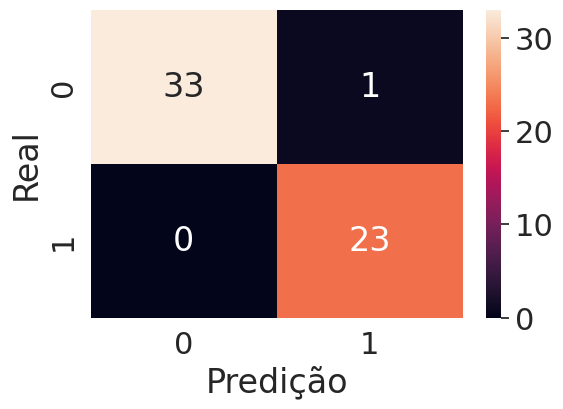

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 4))
sns.set(font_scale = 2)
sns.heatmap(cm, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real");